import dependencies

In [25]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics

import the data

In [4]:
data=pd.read_csv('car data.csv')
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [7]:
data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [8]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            1             0      0  
1            1             0      0  
2            1             0      0  
3            1             0      0  
4            1             0      0  


C:\Users\adith\AppData\Local\Temp\ipykernel_25364\3759195280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\adith\AppData\Local\Temp\ipykernel_25364\3759195280.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)
C:\Users\adith\AppData\Local\Temp\ipykernel_25364\3759195280.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

In [9]:
x=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [10]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            1             0   
1    2013           9.54       43000          1            1             0   
2    2017           9.85        6900          0            1             0   
3    2011           4.15        5200          0            1             0   
4    2014           6.87       42450          1            1             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            1             0   
297  2015           5.90       60000          0            1             0   
298  2009          11.00       87934          0            1             0   
299  2017          12.50        9000          1            1             0   
300  2016           5.90        5464          0            1             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [11]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Spliting the data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


In [13]:
lin_reg=LinearRegression()

In [14]:
lin_reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
train_pred=lin_reg.predict(x_train)
train_acc=metrics.r2_score(y_train,train_pred)
print("Training Accuracy:",train_acc)

Training Accuracy: 0.8838169193709792


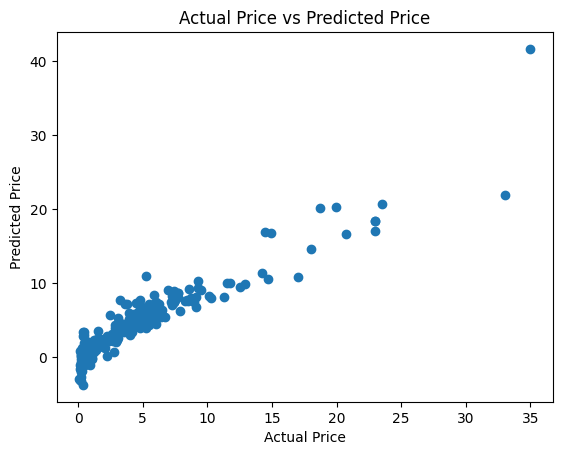

In [16]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [17]:
test_pred=lin_reg.predict(x_test)
test_acc=metrics.r2_score(y_test,test_pred)
print("Testing Accuracy:",test_acc)

Testing Accuracy: 0.8401532365378521


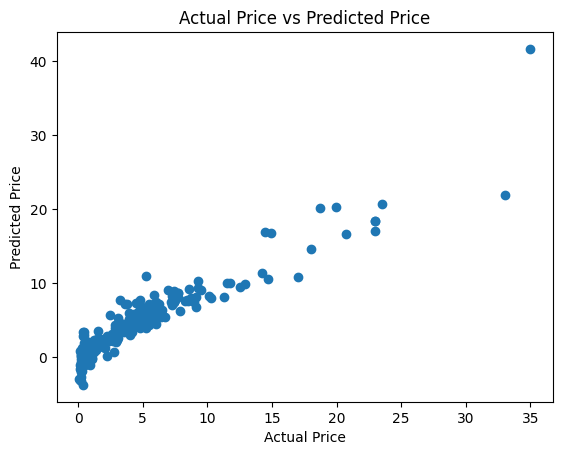

In [18]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")        
plt.show()

In [19]:
lasso_reg=Lasso()

In [20]:
lasso_reg.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [21]:
ltrain_pred=lasso_reg.predict(x_train)
ltrain_acc=metrics.r2_score(y_train,ltrain_pred)
print("Training Accuracy:",ltrain_acc)

Training Accuracy: 0.843587395258283


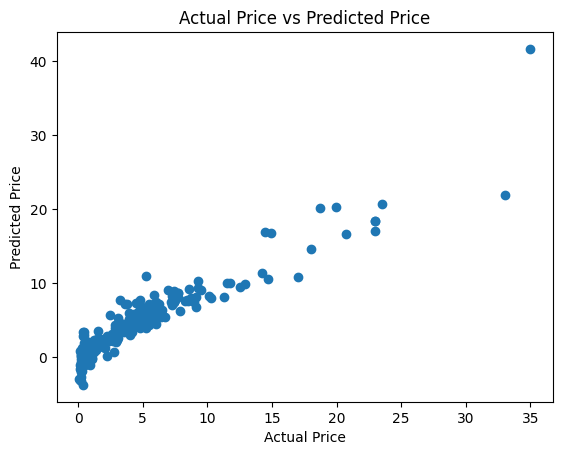

In [22]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


In [23]:
ltest_pred=lasso_reg.predict(x_test)
ltest_acc=metrics.r2_score(y_test,ltest_pred)
print("Testing Accuracy:",ltest_acc)

Testing Accuracy: 0.8497457570738539


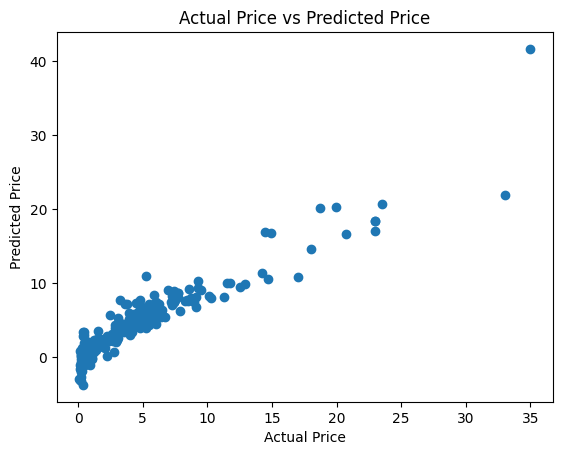

In [24]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")      
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [26]:
xg_reg=XGBRegressor()

In [27]:
xg_reg.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
xtrain_pred=xg_reg.predict(x_train)
xtrain_acc=metrics.r2_score(y_train,xtrain_pred)
print("Training Accuracy:",xtrain_acc)

Training Accuracy: 0.9999967751986191


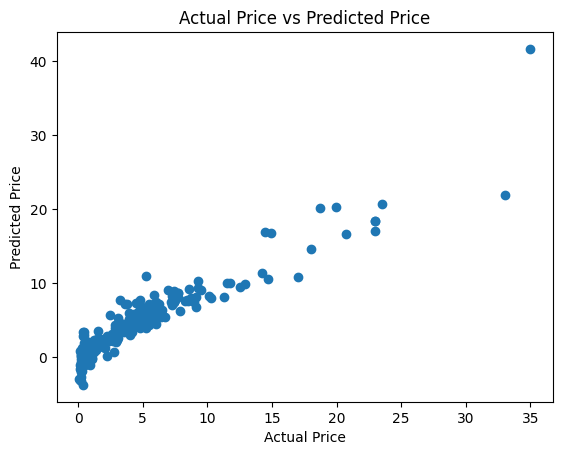

In [29]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [30]:
xtest_pred=xg_reg.predict(x_test)
xtest_acc=metrics.r2_score(y_test,xtest_pred)
print("Testing Accuracy:",xtest_acc)

Testing Accuracy: 0.9623329841151624


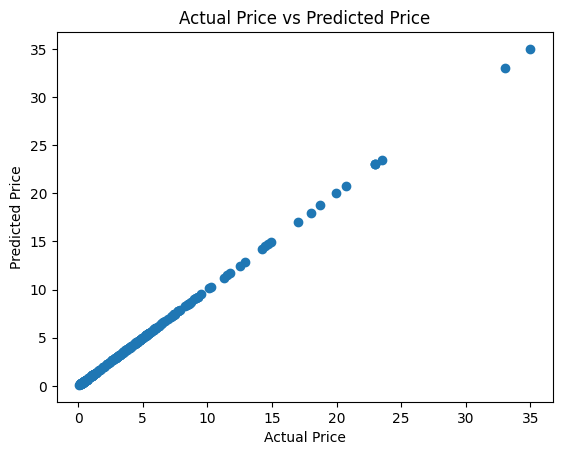

In [31]:
plt.scatter(y_train,xtrain_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

perfect model - XGBoostRegessor